In [94]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [95]:
# Read in dataset
df = pd.read_csv(r'C:\Users\ritwi\Downloads\AI Residency\Datasets\ACME-HappinessSurvey2020.csv')
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


# X2, X5, and X6 were chosen for the model since they had the most skew of all the variables, with X5 and X6 having mostly higher ratings and likely to better predict 1, and X2 having mostly lower ratings and likely to better predict 0

In [97]:
X, y = df[['X2','X5','X6']], df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

# Logistic regression model with l2 regularization to keep all features since there are only 3 and these are all expected to be useful. Liblinear also tends to work better with smaller datasets

In [99]:
# Logistic Regression model initialization
model = LogisticRegression(
    penalty='l2',
    C=10.0,
    solver='liblinear',
    max_iter=1000
)

In [100]:
# model training
model.fit(X_train, y_train)

# prédictions
y_pred = model.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7692307692307693


In [102]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.6842
Recall: 1.0000
F1 Score: 0.7563


In [103]:
model.classes_

array([0, 1], dtype=int64)

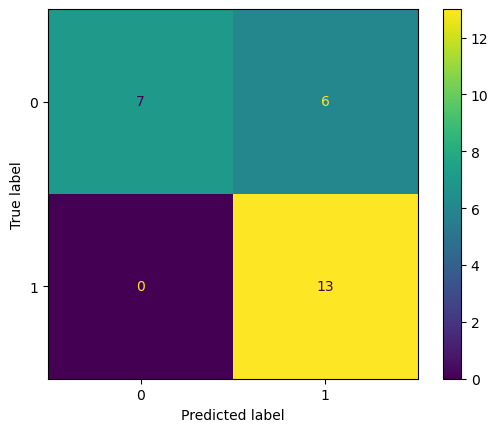

In [104]:
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt

# Assuming 'cm' is your calculated confusion matrix and 'class_names' are your class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Overall model performed fairly well with about 76% accuracy, with perfect prediction of all of the positive classes and correctly classifying over half of the negative class, which is reasonable with less samples and only the X2 variable being a good predictor of the negative class